<a href="https://colab.research.google.com/github/MTBXC/01_Predict-the-Introverts-from-the-Extroverts_Playground-Series---Season-5-Episode-7/blob/main/OpenCV_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.txt' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Computer_Vision/OpenCV/my_img.jpg'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The image has a height of 4160 pixels, a width of 2080 pixels, and 3 color channels.


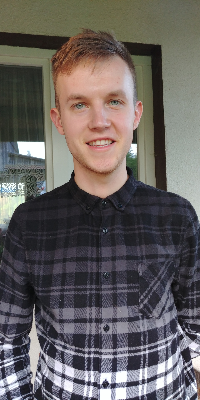

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


img = cv.imread(file_path)
height, width, channels = img.shape

print(f"The image has a height of {height} pixels, a width of {width} pixels, and {channels} color channels.")

resized_img = cv.resize(img, (200, 400), interpolation=cv.INTER_LINEAR)

cv2_imshow(resized_img)

In [3]:
type_img = type(img)
print(type_img)

<class 'numpy.ndarray'>


[ 82 109 113]


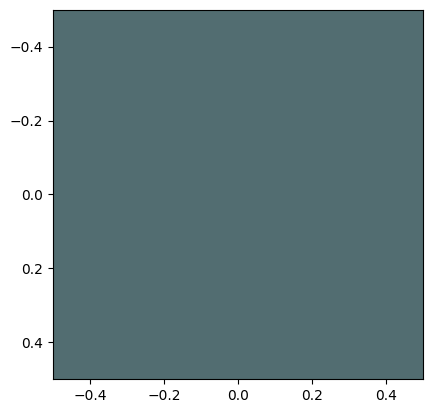

In [4]:
import matplotlib.pyplot as plt
# Analysis of one pixel
px = img[100, 100]
px = np.array(px, dtype=np.uint8)
print(px)

# Ploting Pixel
px_reshaped = px.reshape((1, 1, 3))
plt.imshow(px_reshaped)
plt.show()


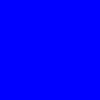

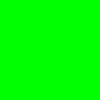

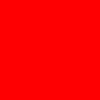

In [5]:
#In OpenCV Default color system is BGR:
# Creating 3 Images (1 pixel each) in space BGR
pixel_blue = np.array([[[255, 0, 0]]], dtype=np.uint8)    # Blue (BGR)
pixel_green = np.array([[[0, 255, 0]]], dtype=np.uint8)   # Green
pixel_red = np.array([[[0, 0, 255]]], dtype=np.uint8)     # Red

blue_big = cv.resize(pixel_blue, (100, 100), interpolation=cv.INTER_NEAREST)
green_big = cv.resize(pixel_green, (100, 100), interpolation=cv.INTER_NEAREST)
red_big = cv.resize(pixel_red, (100, 100), interpolation=cv.INTER_NEAREST)

# Display each pixel as a separate window
cv2_imshow(blue_big)
cv2_imshow(green_big)
cv2_imshow(red_big)

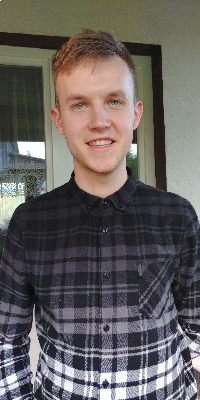

In [6]:
#Changing pixel in the top left corner
resized_img[0, 0] = [255, 255, 255]
cv2_imshow(resized_img)



In [7]:
#Cutting ear
ear = resized_img[100:130, 130:150]
cv2_imshow(ear)

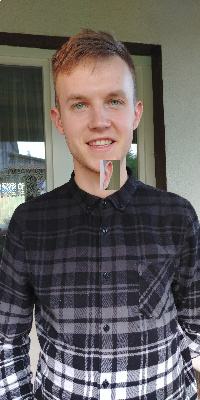

In [8]:
#Paste ear into the image:
resized_img[160:190, 100:120] = ear
cv2_imshow(resized_img)

<class 'numpy.ndarray'>


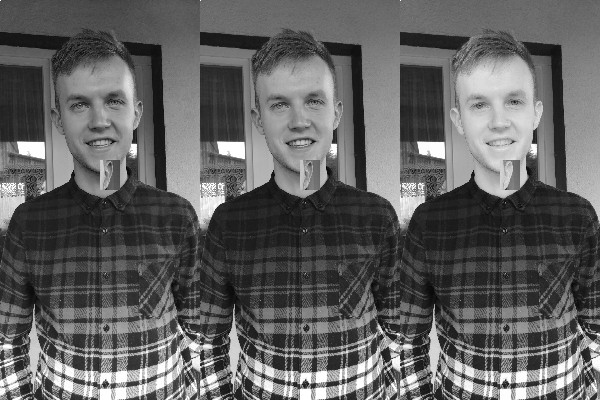

In [10]:
#Splitting channels:
b,g,r = cv.split(resized_img)
print(type(b))
combined = np.hstack((b, g, r))
cv2_imshow(combined)

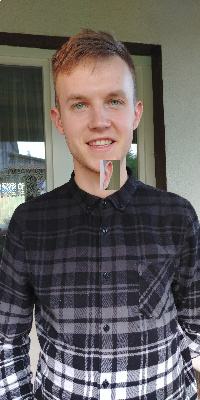

In [11]:
#Merging arrays:
merge = cv.merge((b,g,r))
cv2_imshow(merge)

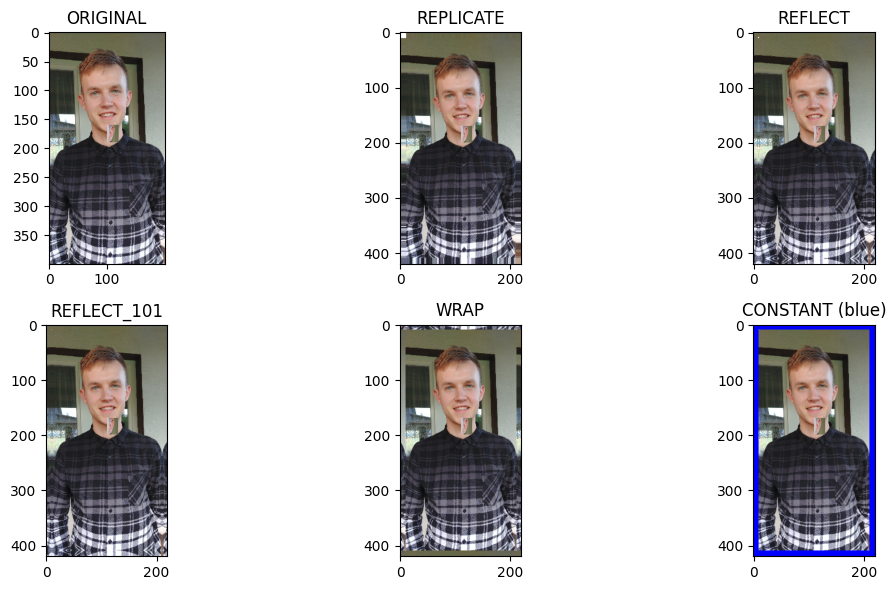

In [15]:
img1 = merge

BLUE = [255, 0, 0]

replicate = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_CONSTANT, value=BLUE)

# Conversion from BGR to RGB in order to displaying in matplotlib
def bgr2rgb(img): return cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(231), plt.imshow(bgr2rgb(img1)), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(bgr2rgb(replicate)), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(bgr2rgb(reflect)), plt.title('REFLECT')
plt.subplot(234), plt.imshow(bgr2rgb(reflect101)), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(bgr2rgb(wrap)), plt.title('WRAP')
plt.subplot(236), plt.imshow(bgr2rgb(constant)), plt.title('CONSTANT (blue)')

plt.tight_layout()
plt.show()

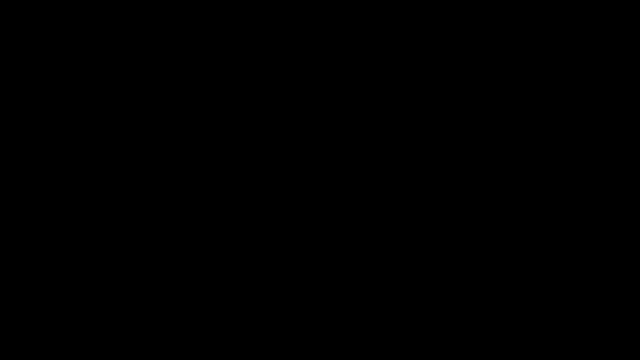

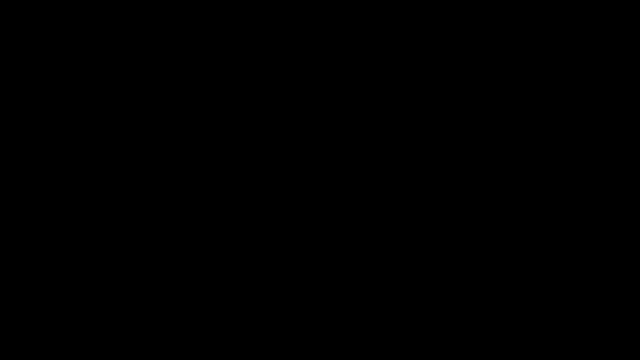

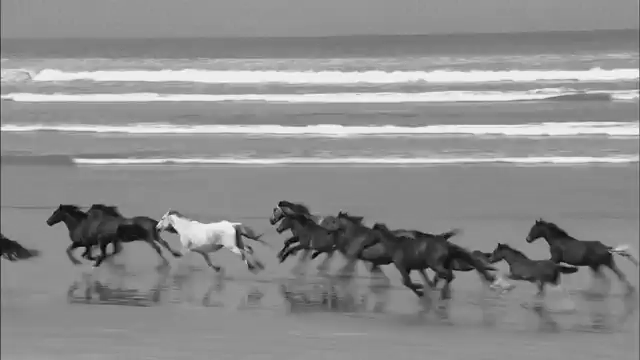

In [26]:
#Load video as frames

file_path_video = '/content/drive/My Drive/Colab Notebooks/Computer_Vision/OpenCV/Wildlife.mp4'

cap = cv.VideoCapture(file_path_video)
fully_read = False
frame_count = 0  # np. show only 3 frames

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        fully_read = True
        break

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv2_imshow(gray)

    frame_count += 1
    if frame_count >= 3:
        break

cap.release()
